
# Task 02-Prediction using Unsupervised ML( Using  Several Clustering Algorhithm)

In this task From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

### Author - Vaibhav Sontakke



***Importing Requires libraries***

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, DBSCAN,KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("Iris.csv")

In [48]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [49]:
df.shape

(150, 6)

In [50]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1:]

In [51]:
lb = LabelEncoder()

In [52]:
actual_classes = lb.fit_transform(y)

## Affinity propagation

In [53]:
#tuning the hyperparameters
params ={
    "preference":[-45,-50,-55,50],
    "max_iter":[100,90,2000]
}

In [54]:
def search_best_affinity_model(max_iter):
    afp = AffinityPropagation(preference=-50, max_iter=max_iter)
    clustering = afp.fit(x)
    acc = accuracy_score(clustering.labels_, actual_classes)
    print("accuracy = {} and max_iter is {}".format(acc, max_iter))   

from multiprocessing import Pool
pool = Pool()                         
pool.map(search_best_affinity_model, [-50,-55,50])
pool.close()
pool.terminate()
pool.join()

In [55]:
for pre in params["max_iter"]:
    search_best_affinity_model(pre)

accuracy = 0.9266666666666666 and max_iter is 100
accuracy = 0.9266666666666666 and max_iter is 90
accuracy = 0.9266666666666666 and max_iter is 2000


In [56]:
afp = AffinityPropagation(preference=-50, max_iter=100)

In [57]:
clustering = afp.fit(x)

In [58]:
pca = PCA(n_components=2)

In [59]:
arr_for_plot = pca.fit_transform(x)

In [60]:
len(arr_for_plot)

150

In [61]:
accuracy_score(clustering.labels_, actual_classes)

0.9266666666666666

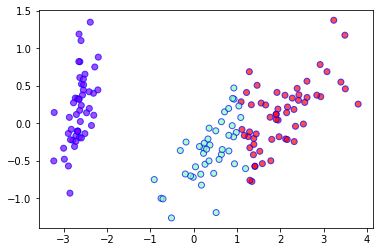

In [62]:
plt.scatter(arr_for_plot[:,:1].reshape(-1), arr_for_plot[:,-1:].reshape(-1), c=clustering.labels_/255,cmap="rainbow",  alpha=0.7, edgecolors='b')
# plt.scatter(x_test,y_pred, c="green")
# plt.scatter(x_test,y_test, c="red")

In [63]:
def scatter_plot_clusters(x, labels):
    pca = PCA(n_components=2)
    arr_for_plot = pca.fit_transform(x)
    plt.scatter(arr_for_plot[:,:1].reshape(-1), arr_for_plot[:,-1:].reshape(-1), c=labels/255,cmap="rainbow",  alpha=0.7, edgecolors='b')

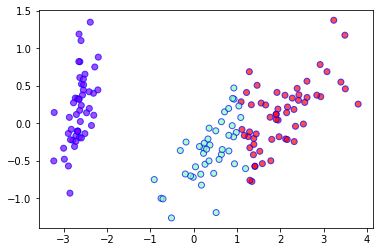

In [64]:
scatter_plot_clusters(x, clustering.labels_)

## Agglomerative Clustering

In [65]:
agc = AgglomerativeClustering(n_clusters=3,linkage="average", affinity="euclidean")

In [66]:
clustering = agc.fit(x)

In [67]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [68]:
labels = clustering.labels_
labels_inv = list(map(lambda x: 0 if x==1 else (1 if x==0 else 2) ,labels))
print(labels_inv)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]


In [69]:
accuracy_score(labels_inv, actual_classes)

0.9066666666666666

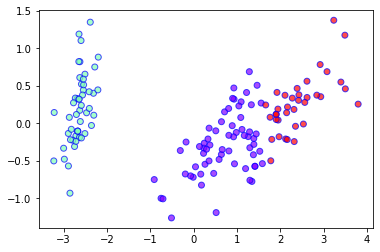

In [70]:
scatter_plot_clusters(x, clustering.labels_)

In [71]:
actual_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Birch Clustering

In [72]:
brc = Birch(n_clusters=3, branching_factor=50, threshold=0.0001)

In [73]:
clustering = brc.fit(x)

In [74]:
labels = clustering.labels_
labels_inv = list(map(lambda x: 2 if x==2 else (1 if x==0 else 0) ,labels))
print(labels_inv)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]


In [75]:
accuracy_score(labels_inv, actual_classes)

0.8933333333333333

In [76]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

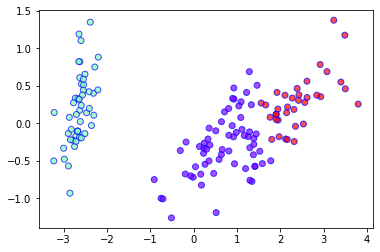

In [77]:
scatter_plot_clusters(x, clustering.labels_)

## DBSCAN

In [78]:
dbs = DBSCAN(eps=0.6999, min_samples=30, leaf_size=30, algorithm="auto")

In [79]:
clustering = dbs.fit(x)

In [80]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1])

In [81]:
labels = clustering.labels_
labels_inv = list(map(lambda x: 0 if x==0 else (1 if x==1 else 2) ,labels))
print(labels_inv)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]


In [82]:
accuracy_score(labels_inv, actual_classes)

0.8

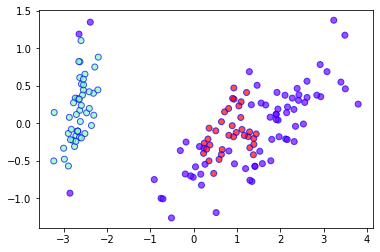

In [83]:
scatter_plot_clusters(x, clustering.labels_)

## K-Means clustering

In [84]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=200, 
    tol=1e-04, random_state=0
)
clustering = kmeans.fit_predict(x)
print(clustering)


[2 6 6 6 2 9 6 2 6 6 9 2 6 6 9 9 9 2 9 2 2 2 6 2 2 6 2 2 2 6 6 2 9 9 6 6 9
 6 6 2 2 6 6 2 2 6 2 6 9 2 1 1 1 4 1 4 1 0 1 4 0 4 4 1 4 1 4 4 1 4 8 4 8 1
 1 1 1 1 1 0 0 0 4 8 4 1 1 1 4 4 4 1 4 0 4 4 4 1 0 4 3 8 7 3 3 7 4 7 3 5 3
 8 3 8 8 3 3 5 7 8 3 8 7 8 3 7 8 8 3 7 7 5 3 8 8 7 3 3 8 3 3 3 8 3 3 3 8 3
 3 8]


In [85]:
 kmeans.cluster_centers_



array([[5.24285714, 2.37142857, 3.44285714, 1.02857143],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [5.08      , 3.5       , 1.545     , 0.29      ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.62857143, 2.72380952, 4.13333333, 1.2952381 ],
       [7.6       , 3.73333333, 6.4       , 2.23333333],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [7.43333333, 2.92222222, 6.26666667, 1.98888889],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.49      , 3.92      , 1.46      , 0.26      ]])

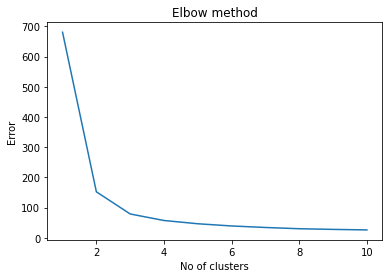

In [86]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()